In [39]:
from __future__ import (absolute_import, division, print_function, 
   unicode_literals, generators, nested_scopes, with_statement)
from builtins import (bytes, dict, int, list, object, range, str, ascii,
   chr, hex, input, next, oct, open, pow, round, super, filter, map, zip)
# The above imports should allow this program to run in both Python 2 and
# Python 3.  You might need to update your version of module "future".
import sys
import os
import math
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import statistics
import pandas as pd
import numpy as np
import math
from scipy.stats import cauchy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [40]:
# Need to use package inside `Required_Python_Packages`
import ProgramName 
from Rex import Rex
rex=Rex()
import TempFilename
from SummaryStats import SummaryStats
from StanParser import StanParser

In [41]:
# To plot posterior median of all variants
def plotPosteriorMedian(version,algorithm,theta,per,reads):
    list1 = []
    list2 = []
    list_s = []
    parser = StanParser("./STANOUTPUTS/{}_{}_{}_data_{}_1000_read{}.txt.staninputs.stanoutputs".format(version, algorithm,theta,per,reads))
    for i in range(1000):
        x = statistics.median(parser.getVariable("theta.{}".format(i+1)))
        list1.append(x)
    print(len(list1))
    fig = plt.figure(figsize=(6, 2))
    sns.distplot(list1, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 1}, color = 'c')
    plt.axvline(x = statistics.median(list1))

    plt.xlabel('effect size')
    plt.ylabel('Distribution of medians')
    plt.title('{} Theta = {} with {}, median = {}'.format(algorithm,theta, version,statistics.median(list1)))    
    fig = plt.figure(figsize=(8, 4))

In [42]:
# Plot a single posterior of one variants 
def plotSinglePosterior(version,algorithm,theta,number):
    parser = StanParser("./STANOUTPUTS/{}_{}_{}_data_1.0_1000_read100.txt.staninputs.stanoutputs".format(version, algorithm,theta))
    x = np.log2(np.exp(np.array(parser.getVariable("theta.{}".format(number)))))    
    sd= statistics.stdev(parser.getVariable("theta.{}".format(number)))
    s = parser.getVariable("s")                                    
    fig = plt.figure(figsize=(6, 2))
    sns.distplot(x, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 1}, color = 'c')
    plt.axvline(x = theta)
    plt.xlim(0,4)
    plt.xlabel('effect size')
    plt.ylabel('Distribution of medians')
    plt.title('{};Theta ={};with;{};sd={};s={}'.format(algorithm, theta,version,sd,s[number]))    


In [43]:
# Run the model
def run_model(version,algorithm,theta,per,reads):
    if (algorithm == "MCMC"):
        cmd1 = "./{} sample thin=1 num_samples=1000 data file=./STANINPUTS/{}_data_{}_1000_read{}.txt.staninputs output file=./STANOUTPUTS/{}_MCMC_{}_data_{}_1000_read{}.txt.staninputs.stanoutputs".format(version,theta,per,reads,version,theta,per,reads)
    elif (algorithm == "VI"):
        cmd1 = "./{} variational data file=./STANINPUTS/{}_data_{}_1000_read{}.txt.staninputs output file=./STANOUTPUTS/{}_VI_{}_data_{}_1000_read{}.txt.staninputs.stanoutputs".format(version,theta,per,reads,version,theta,per,reads)
    os.system(cmd1)    

In [44]:
def GetPreg(version, algorithm, theta,per,reads):
    preg=[]
    parser=StanParser('./STANOUTPUTS/{}_{}_{}_data_{}_1000_read{}.txt.staninputs.stanoutputs'.format(version, algorithm, theta,per,reads))
    l=1
    for i in range(1000):
        x = parser.getVariable("theta.{}".format(i+1))
        right = sum(i > l for i in x)/int(len(x))
        left = sum(i < float(1/l) for i in x)/int(len(x))
        if right > left:Preg = right
        else: Preg = left
        preg.append(Preg)
    return preg

In [45]:
def plot_roc_curve(label,version, algorithm, theta,per,reads):
    preg = GetPreg(version, algorithm, theta,per,reads)
    fpr, tpr, thresholds = roc_curve(np.array(label), preg)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC_AUC={}, version={}, \n algo={}, theta={}, per={}, reads={}'.format(roc_auc_score(np.array(label),preg),version, algorithm, theta,per,reads))
    plt.legend()
    plt.show()

In [46]:
def plot(x,label1='x'):
    fig = plt.figure(figsize=(10, 5))
    sns.distplot(x, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 1})
    plt.axvline(x = statistics.median(x))
    fig.legend(labels = [label1])
    plt.title("median: {}".format(statistics.median(x)))

def plot2(x,y,label1 = 'x', label2='y'):
    fig = plt.figure(figsize=(10, 5))
    sns.distplot(x, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 1})
    sns.distplot(y, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 1})
    fig.legend(labels = [label1,label2])
    plt.axvline(x = statistics.median(x))
    plt.axvline(x = statistics.median(y))
    plt.title("median1: {}; median2: {}".format(statistics.median(x),statistics.median(y))) 

def plot3(x,y,z,label1='x',label2='y',label3='z'):
    fig = plt.figure(figsize=(10, 5))
    sns.distplot(x, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 1})
    sns.distplot(y, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 1})
    sns.distplot(z, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 1})
    fig.legend(labels = [label1,label2,label3])
    plt.axvline(x = statistics.median(x))
    plt.axvline(x = statistics.median(y))
    plt.axvline(x = statistics.median(z))
    plt.title("median1: {}; median2: {}; median3: {}".format(statistics.median(x),statistics.median(y),statistics.median(z))) 


In [550]:
#Model version
model = "multiple2_merge_function_new3"


# "MCMC" is algorithm used, can also be "VI"
# 0.05 is ther percentage of regulatory variants, can be 1.0
# 5050 means DNA depth per pair = RNA depth per pair = 50 
# since all inputs simulated here would have 1000 variants and regulatory effect as 2, 
# so 1000 and 2 are omited.
run_model(model,"MCMC",2,0.05,5050)
run_model(model,"MCMC",2,0.05,3030)
run_model(model,"MCMC",2,0.01,5050)
run_model(model,"MCMC",2,0.01,3030)


In [49]:
model = "multiple2_merge_function_normal_p"
run_model(model,"MCMC",2,1.0,5050)
model = "multiple2_merge_function_normal_qi"
run_model(model,"MCMC",2,1.0,5050)
model = "multiple2_merge_function_normal_p_qi"
run_model(model,"MCMC",2,1.0,5050)
model = "multiple2_merge_function_normal_theta"
run_model(model,"MCMC",2,1.0,5050)

1000
1000
1000
1000
1000


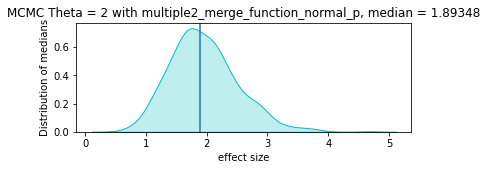

<Figure size 576x288 with 0 Axes>

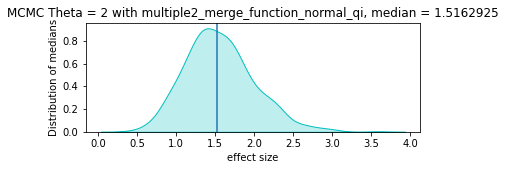

<Figure size 576x288 with 0 Axes>

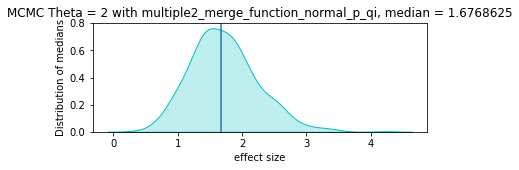

<Figure size 576x288 with 0 Axes>

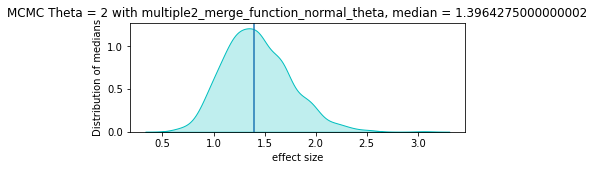

<Figure size 576x288 with 0 Axes>

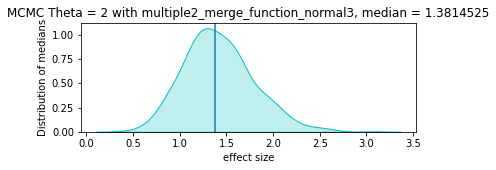

<Figure size 576x288 with 0 Axes>

In [112]:
model = "multiple2_merge_function_normal_p"
plotPosteriorMedian(model,"MCMC",2,1.0,5050)
model = "multiple2_merge_function_normal_qi"
plotPosteriorMedian(model,"MCMC",2,1.0,5050)
model = "multiple2_merge_function_normal_p_qi"
plotPosteriorMedian(model,"MCMC",2,1.0,5050)
model = "multiple2_merge_function_normal_theta"
plotPosteriorMedian(model,"MCMC",2,1.0,5050)
model = "multiple2_merge_function_normal3"
plotPosteriorMedian(model,"MCMC",2,1.0,5050)

1000
1000
1000
1000
1000


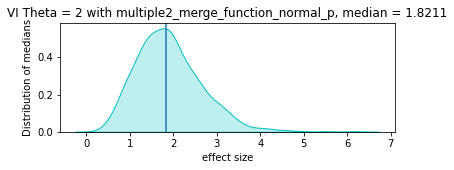

<Figure size 576x288 with 0 Axes>

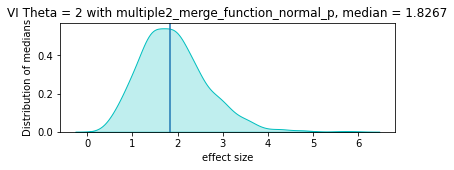

<Figure size 576x288 with 0 Axes>

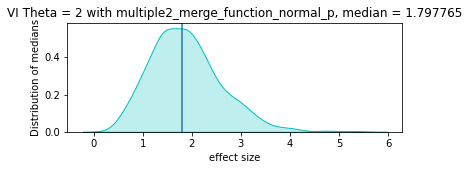

<Figure size 576x288 with 0 Axes>

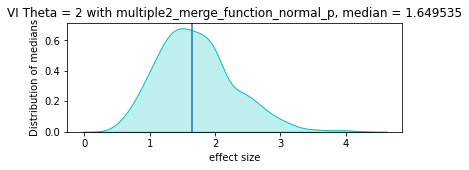

<Figure size 576x288 with 0 Axes>

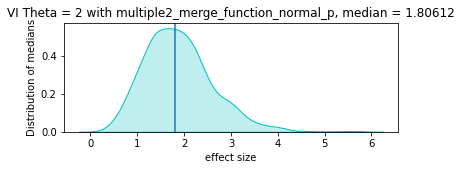

<Figure size 576x288 with 0 Axes>

In [50]:
model = "multiple2_merge_function_normal_p"
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)


1000
1000
1000
1000
1000


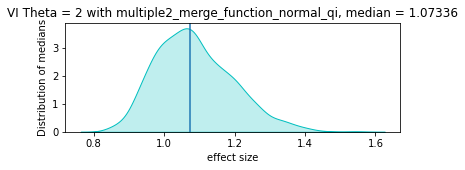

<Figure size 576x288 with 0 Axes>

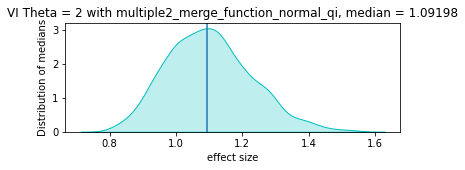

<Figure size 576x288 with 0 Axes>

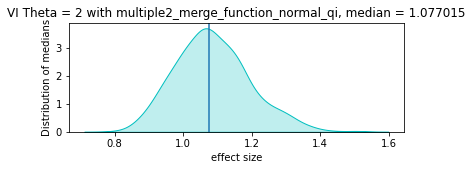

<Figure size 576x288 with 0 Axes>

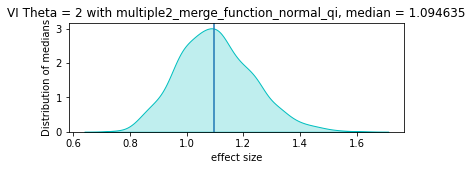

<Figure size 576x288 with 0 Axes>

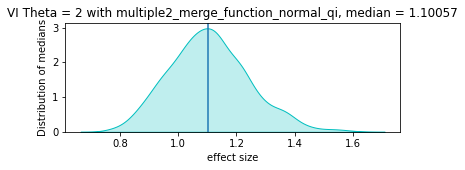

<Figure size 576x288 with 0 Axes>

In [51]:
model = "multiple2_merge_function_normal_qi"
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)


1000
1000
1000
1000
1000


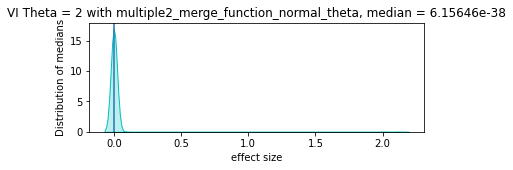

<Figure size 576x288 with 0 Axes>

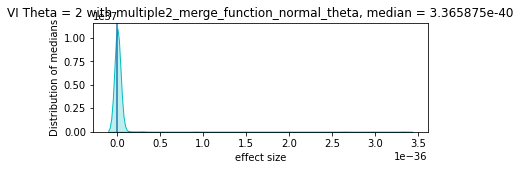

<Figure size 576x288 with 0 Axes>

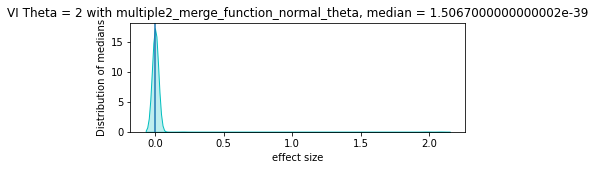

<Figure size 576x288 with 0 Axes>

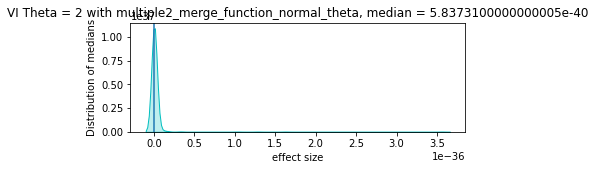

<Figure size 576x288 with 0 Axes>

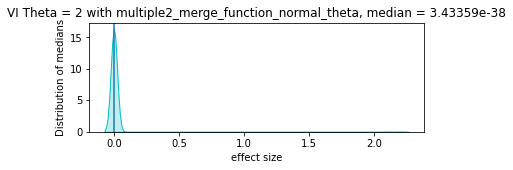

<Figure size 576x288 with 0 Axes>

In [53]:
model = "multiple2_merge_function_normal_theta"
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)

1000
1000
1000
1000
1000


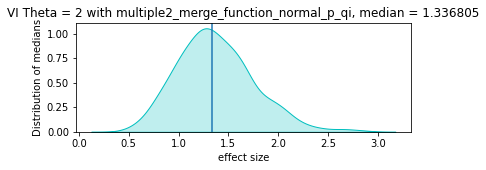

<Figure size 576x288 with 0 Axes>

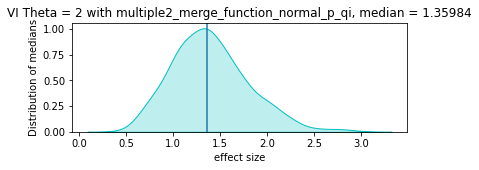

<Figure size 576x288 with 0 Axes>

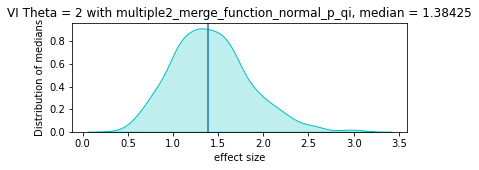

<Figure size 576x288 with 0 Axes>

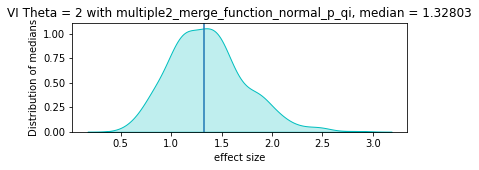

<Figure size 576x288 with 0 Axes>

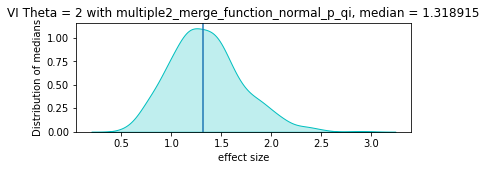

<Figure size 576x288 with 0 Axes>

In [55]:
model = "multiple2_merge_function_normal_p_qi"
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)
run_model(model,"VI",2,1.0,5050)
plotPosteriorMedian(model,"VI",2,1.0,5050)

In [65]:
model = "multiple2_merge_function_normal_p"
run_model(model,"MCMC",2,0.05,5050)



In [102]:
model = "multiple2_merge_function_normal_p"
run_model(model,"VI",2,0.05,5050)
parser = StanParser("STANOUTPUTS/multiple2_merge_function_normal_p_VI_2_data_0.05_1000_read5050.txt.staninputs.stanoutputs")
rep1= []
for i in range(1000):
    rep1.append(parser.getVariable("theta.{}".format(i+1)))

run_model(model,"VI",2,0.05,5050)
parser = StanParser("STANOUTPUTS/multiple2_merge_function_normal_p_VI_2_data_0.05_1000_read5050.txt.staninputs.stanoutputs")
rep2= []
for i in range(1000):
    rep2.append(parser.getVariable("theta.{}".format(i+1)))

run_model(model,"VI",2,0.05,5050)
parser = StanParser("STANOUTPUTS/multiple2_merge_function_normal_p_VI_2_data_0.05_1000_read5050.txt.staninputs.stanoutputs")
rep3= []
for i in range(1000):
    rep3.append(parser.getVariable("theta.{}".format(i+1)))

run_model(model,"VI",2,0.05,5050)
parser = StanParser("STANOUTPUTS/multiple2_merge_function_normal_p_VI_2_data_0.05_1000_read5050.txt.staninputs.stanoutputs")
rep4= []
for i in range(1000):
    rep4.append(parser.getVariable("theta.{}".format(i+1)))

In [107]:
rep = np.concatenate((rep1,rep2,rep3,rep4),axis=1)
rep.shape
rep_theta = np.median(rep,axis=1)


preg=[]
l=1
for i in range(1000):
    x = rep[i]
    right = sum(i > l for i in x)/int(len(x))
    left = sum(i < float(1/l) for i in x)/int(len(x))
    if right > left:Preg = right
    else: Preg = left
    preg.append(Preg)

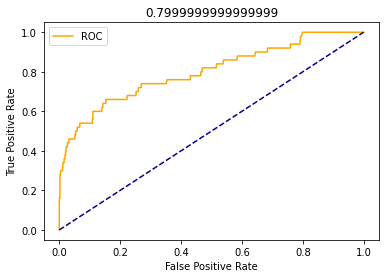

In [111]:
pos = 50
label = np.ones(pos, dtype=int).tolist()+np.zeros(1000-pos, dtype=int).tolist()
fpr, tpr, thresholds = roc_curve(np.array(label), preg)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(roc_auc_score(np.array(label),preg))
plt.legend()


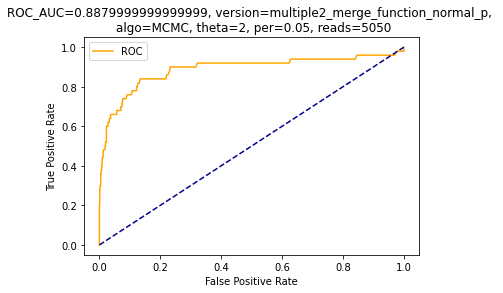

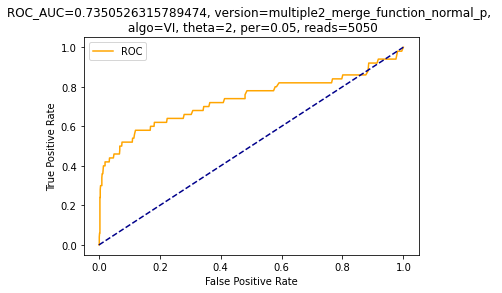

In [68]:
pos = 50
label = np.ones(pos, dtype=int).tolist()+np.zeros(1000-pos, dtype=int).tolist()
plot_roc_curve(label,'multiple2_merge_function_normal_p','MCMC',2,pos/1000,5050)

pos = 50
label = np.ones(pos, dtype=int).tolist()+np.zeros(1000-pos, dtype=int).tolist()
plot_roc_curve(label,'multiple2_merge_function_normal_p','VI',2,pos/1000,5050)



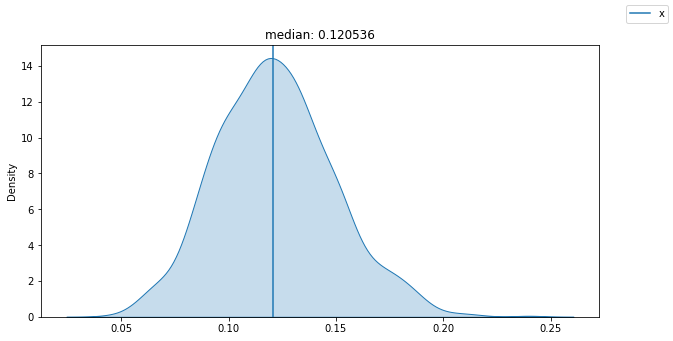

In [444]:
# multi-site-BIRD
## cmdStan: Multi-site BIRD model and its other derived models.
1. `multiple2.stan` 
    - The originla multi-site BIRD model 
2. `functions.stan` 
    - The functions for `multiple2.stan`
3. `multiple2_merge_function.stan`
    - the model merged both `multiple2.stan` and `functions.stan`. All derived models are based on this one in order to prevent bugs of cmdStan reading function block file. 
4. `multiple2_merge_function_new.stan`
    - Modification: Use `theta` as deterministic parameter instead of `q`
    ```
    transformed parameters {
        real<lower=0> theta[N_VARIANTS];
        for(j in 1:N_VARIANTS)
            theta[j] = (q[j]/p[j])/((1-q[j])/(1-p[j]));
    }
    ```
5. `multiple2_merge_function_new2.stan`
    - Modification: Use `p` as deterministic parameter instead of `q`
    ```
    transformed parameters { 
        real<lower=0,upper=1> p[N_VARIANTS];
        for(j in 1:N_VARIANTS)
            p[j]= q[j]/(theta[j]-theta[j]*q[j]+q[j]);
    }
    ```
6. `multiple2_merge_function_new3.stan`
    - Modification: Give `theta` a fixed prior. 
    ```
    model{
    ...
    theta[j] ~ normal(1,1);
    ...
    }
    ```
    
7. `multiple2_merge_function_normal3.stan`
    - Modification: Turn `qi`,`p` and `theta` into normal distribution through logit and log transformation
    ```
    parameters {
    ...
        real p_logit[N_VARIANTS];
        real qi_logit[N_VARIANTS,N_RNA];
        real theta_log[N_VARIANTS];
    ...
    }
    transformed parameters { // ORDER MATTERS!
        real<lower=0,upper=1> p[N_VARIANTS]; // untransformed p
        for(j in 1:N_VARIANTS)
            p[j]=inv_logit(p_logit[j]);
        real<lower=0,upper=1> qi[N_VARIANTS,N_RNA]; //untransformed qi
        for(j in 1:N_VARIANTS){
            for(i in 1:N_RNA){
                qi[j,i] = inv_logit(qi_logit[j,i]);
            }
        }
        real<lower=0> theta[N_VARIANTS];
        for(j in 1:N_VARIANTS){
            theta[j]=exp(theta_log[j]);
        ...
   }
   ```
8. `qi_q.stan`
    - BIRD model breakdown, to simply infer `q` from `qi`

## cmdStan: Input and Output Naming (__IMPORTANT!!__)
1. `STANINPUTS/0.5_data_0.01_1000_read100.txt`
    - This a human readable simulated input where `theta` is simulated as 0.5 for regulatory variants, `0.01` means there are 1 percent regulatory variants (when this number = 1.0, this means all of variants are regulatory variants), `1000` means there are 1000 variants in total, `read100` means 100 reads for DNA and 100/10=10 reads (10 is the number of RNA sites) for each RNA pair. If there is something like `read5050`, this means there are 50 reads for DNA and 50 reads for each of RNA pair. 
2. `STANINPUTS/0.5_data_0.01_1000_read100.txt.staninputs`
    - Stan readable inputs.
3. `STANOUTPUTS/multiple2_merge_function_new_VI_0.5_data_0.01_1000_read100.txt.staninputs.stanoutputs`
    - Stan outputs for this input. `multiple2_merge_function_new` is the version name of the model and `VI` is the algorithm (variational inference) or it could be `MCMC`(NUTS). 

## cmdStan: Other accessory files
1. `data_simulator_together.ipynb` 
    - Used to simulate data (__`Required_Python_Packages` needed__)
    - __Please see in the notebook for details of model version control and input control.__
        
        a. The data of all variants to have same simulated `theta`(usually `theta=2`). To investigate the bias of different algorithm. 
      
        b. The data of small percentage of regulatory variants(usually `theta=2`) and rest of null variants(`theta=1`). To investigate the accuracy of the model and algorithm. 
2. `sim-equal.R`
    - Used in `data_simulator_together.ipynb` to simulate data. 
3. `cmdStan_results_analysis.ipynb`
    - Used to run different models in different algorithms(MCMC or VI in Stan)
    - Used to plot distribution of all variants `theta` posterior medians. (Use data from __1a__)
    - Used to plot auc_roc (Need to use data from __1b__)
    - __Please see the details of model version control and inputs control in the notebook__

## cmdStan: Other accessory directories 
1. `STANINPUTS`
    - To store all simulated inputs including the visible inputs and inputs for Stan. 
2. `STANOUTPUTS`
    - To store all Stan's outputs 
3. `Required_Python_Packages`
    - All __required__ customized packages for this project. 
4. `BIRD`
    - published single-site BIRD model and its accessories.
5. `cmdstan-2.27.0`
    - cmdStan for this project.
6. `JABS`
    - JABS algorithm to control FDR, including simplified ASE model and its simulation accessories. 
7. `P_simulation`
    - simulation to investigate `p`'s effect on logit transformation. 

## RStan (MCMC)
1. `rstan.Rmd`
    - Use RStan to run 4 chains independently in order to compare with RJAGS.
    - 6 different datasets for `multiple2_merge_function.stan` model. 
        a. `stan_model_30`:1000 variants with `theta=2`, DNA depth each pair = RNA depth each pair = 30 (To test bias)
        
        b. `stan_model_50`:1000 variants with `theta=2`, DNA depth each pair = RNA depth each pair = 50 (To test bias)
        
        c. `stan_model_001_30`: 1000 variants, 1 percent are regulatory with `theta=2`, 99 percent are null variants with `theta=1`, DNA depth each pair = RNA depth each pair = 30 (To test accuracy)
        
        d. `stan_model_001_50`: 1000 variants, 1 percent are regulatory with `theta=2`, 99 percent are null variants with `theta=1`, DNA depth each pair = RNA depth each pair = 50 (To test accuracy)
        
        e. `stan_model_005_30`: 1000 variants, 5 percent are regulatory with `theta=2`, 95 percent are null variants with `theta=1`, DNA depth each pair = RNA depth each pair = 30 (To test accuracy)
        
        f. `stan_model_005_50`: 1000 variants, 5 percent are regulatory with `theta=2`, 95 percent are null variants with `theta=1`, DNA depth each pair = RNA depth each pair = 50 (To test accuracy)

## RJAGS (MCMC)
1. `JAGS/rjags.Rmd`
    - Use RJAGS to run 4 chains independently in order to compare with RStan.
    - 6 different datasets for `multiple2_merge_function.stan` model. 
        a. `model_30`:1000 variants with `theta=2`, DNA depth each pair = RNA depth each pair = 30 (To test bias)
        
        b. `model_50`:1000 variants with `theta=2`, DNA depth each pair = RNA depth each pair = 50 (To test bias)
        
        c. `model_001_30`: 1000 variants, 1 percent are regulatory with `theta=2`, 99 percent are null variants with `theta=1`, DNA depth each pair = RNA depth each pair = 30 (To test accuracy)
        
        d. `model_001_50`: 1000 variants, 1 percent are regulatory with `theta=2`, 99 percent are null variants with `theta=1`, DNA depth each pair = RNA depth each pair = 50 (To test accuracy)
        
        e. `model_005_30`: 1000 variants, 5 percent are regulatory with `theta=2`, 95 percent are null variants with `theta=1`, DNA depth each pair = RNA depth each pair = 30 (To test accuracy)
        
        f. `model_005_50`: 1000 variants, 5 percent are regulatory with `theta=2`, 95 percent are null variants with `theta=1`, DNA depth each pair = RNA depth each pair = 50 (To test accuracy)


## Tensorflow-probability (Variational Inference)
1. `simple_VI_tfp.ipynb`
2. The variational inference feature is only in `tfp-nightly` or the newest tensorflow-probability version (0.13.0+).
3. check https://www.tensorflow.org/probability/examples/TFP_Release_Notebook_0_13_0 or https://www.tensorflow.org/probability/examples/Variational_Inference_and_Joint_Distributions or http://hyperion.usc.edu/UQ-SummerSchool/pres/Dillon.pdf for further variational inference tutorial in TFP. 

## Pyro (Variational Inference)
1. `simple_VI_pyro.ipynb`
2. check http://pyro.ai/examples/svi_part_i.html for futher stochastic variational inference tutorial in Pyro.

